<a href="https://colab.research.google.com/github/thebabycode/ML/blob/main/ML_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/ML/Mobile/train.csv')
data_train = pd.read_csv('/content/drive/MyDrive/ML/Mobile/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


id: ID

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w : Screen Width of mobile in cm

talk_time : longest time that a single battery charge will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

**Target feature description:**
price_range - Phone price with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [5]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

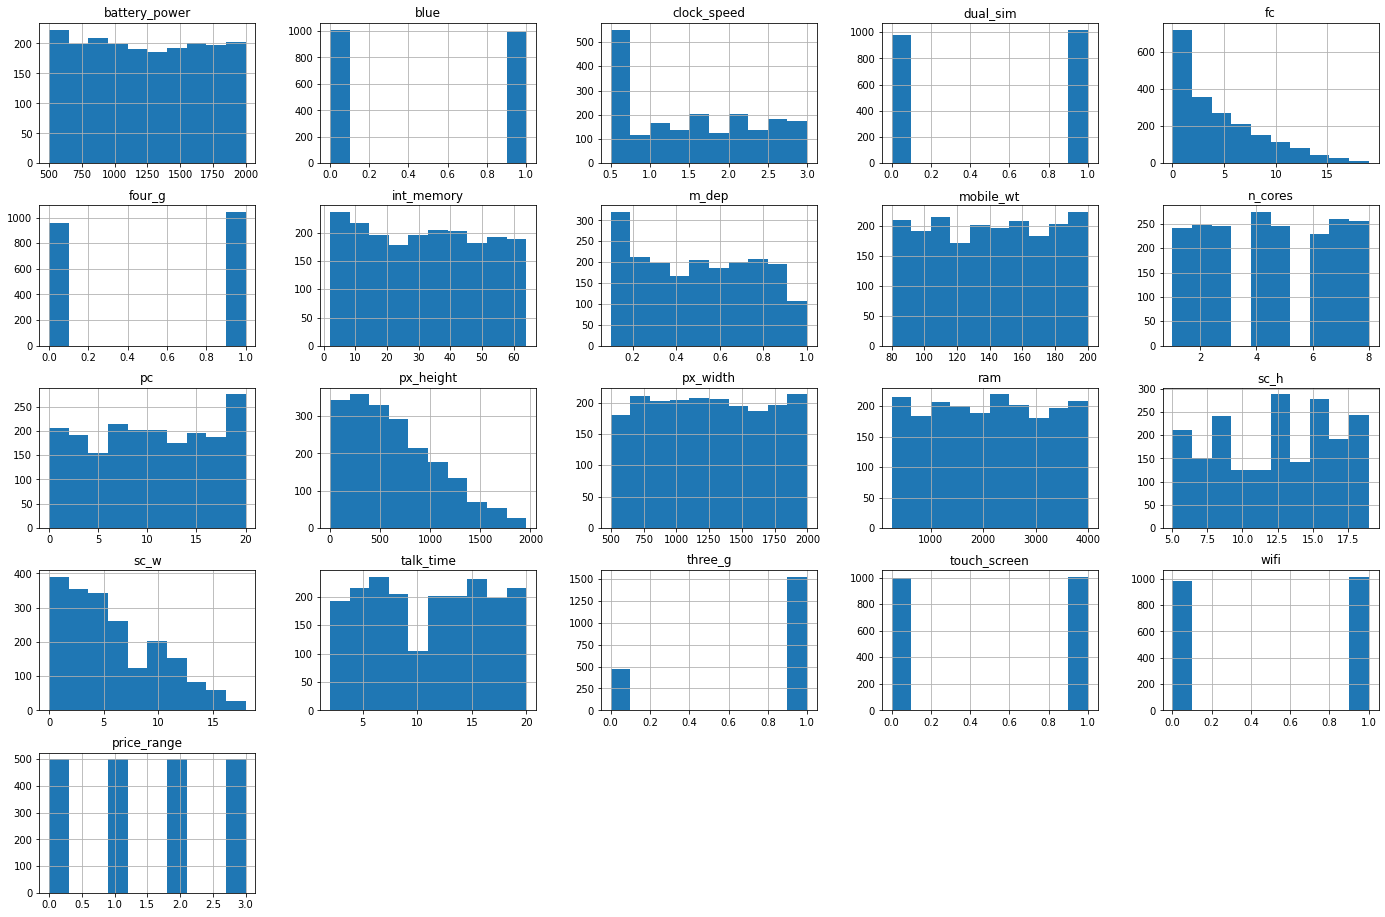

In [7]:
data.hist(figsize = (24, 16))
plt.show()

Except "three_g", distributions in all other features are balanced, as well as the classes of the target.

6 features are of boolean type. These features are "blue", "dual_sim", "four_g", "three_g", "touch_screen", and "wifi". In addition, values of the feature "n_cores" are discrete.

In [8]:
# Splitting continuous features and discrete ones for further exploration and visualization.

disc_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']
cont_features = [col for col in data.columns if col not in disc_features + ['price_range']]
len(cont_features) + len(disc_features)

20

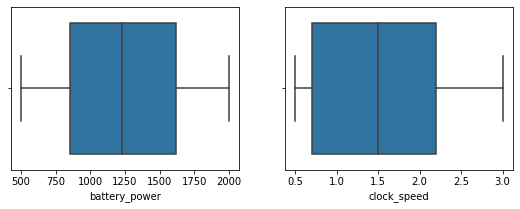

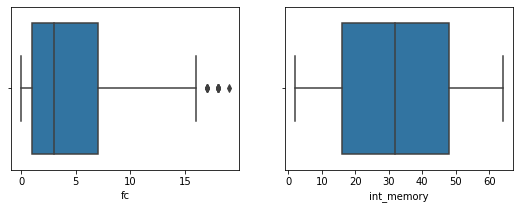

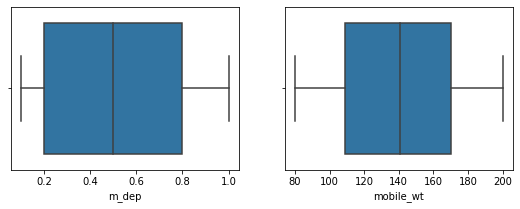

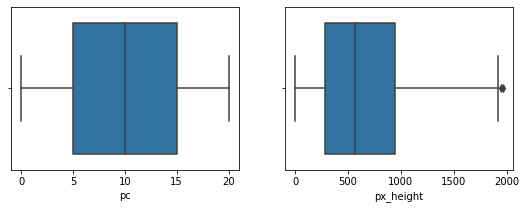

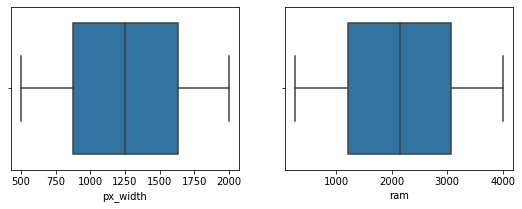

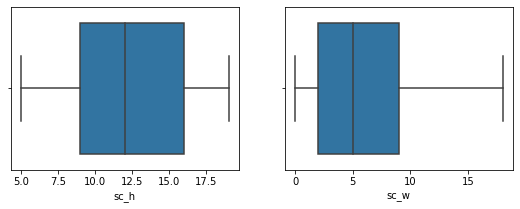

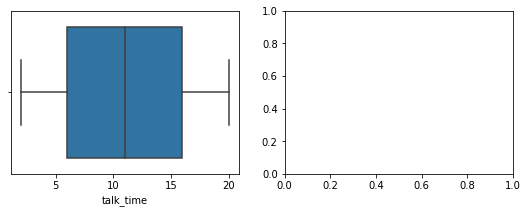

In [24]:
i = 0
while i < len(cont_features):
    try:
        fig = plt.figure(figsize = (9,3))
        plt.subplot(1,2,1)
        sns.boxplot(x = cont_features[i], data = data)
        i += 1
        plt.subplot(1,2,2)
        sns.boxplot(x = cont_features[i], data = data)
        i += 1
    except:
        continue
plt.show()

Based on the box plots, there are few numbers of outliers in "fc" and "px_height" columns. However, the distance between these outliers and the rest of the data is not significant.

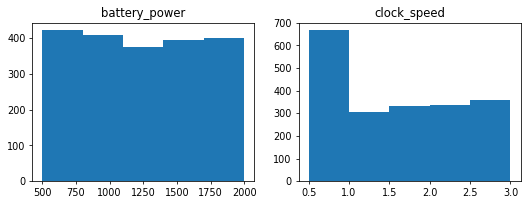

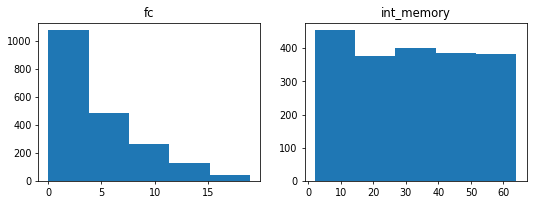

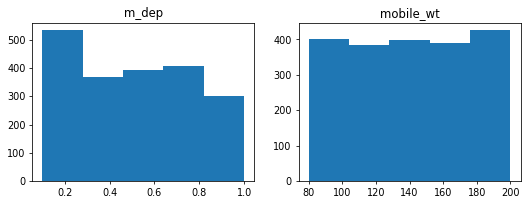

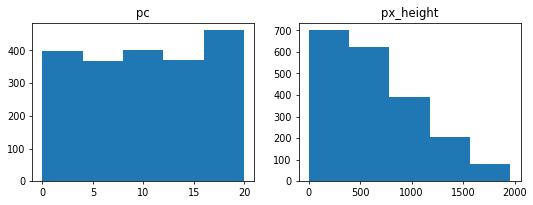

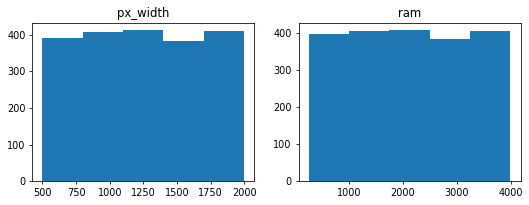

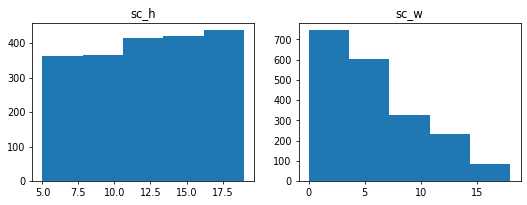

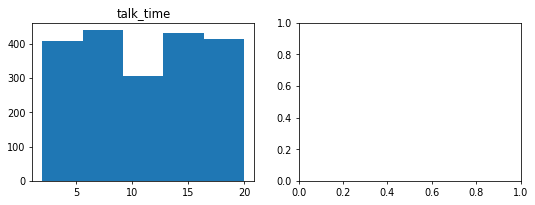

In [30]:
i = 0
while i < len(cont_features):
    try:
        fig = plt.figure(figsize = (9, 3), dpi = 70)
        plt.subplot(1,2,1)
        plt.hist(data[cont_features[i]], bins = 5)
        plt.title(cont_features[i])
        i += 1
        plt.subplot(1,2,2)
        plt.hist(data[cont_features[i]], bins = 5)
        plt.title(cont_features[i])
        i += 1
    except:
        continue
plt.show()

Regarding the plots above, there are values equal to zero in both "px_height" and "sc_w". The problem with these points is that they cannot represent a feature of a mobile phone, as there is no 1D pixel or a 1D screen !

In [31]:
px_mask = data['px_height'] == 0
sc_mask = data['sc_w'] == 0
print(f'pixel height = 0  :  {sum(px_mask)}')
print(f'screen width = 0  :  {sum(sc_mask)}')

pixel height = 0  :  2
screen width = 0  :  180


As the number of zeros in "px_height" is negligible, the related rows can be removed. But, regarding "sc_w",the number of samples with a missing value is as many as removing those samples may not be the best way to deal with.